## Internet News Headlines NLP

Goal:Analyzing Internet News Headlines with NLP and predicting whether the headline is positive by sentiment analysis.

In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!pip install textblob
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [13]:
df=pd.read_csv("abcnews-date-text.csv",parse_dates=['publish_date'])

In [15]:
df.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [16]:
df.tail()

,publish_date,headline_text
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...
1226257,2020-12-31,womens shed canberra reskilling unemployed pan...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1226258 non-null  datetime64[ns]
 1   headline_text  1226258 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.7+ MB


In [18]:
df.shape

(1226258, 2)

In [19]:
df.columns=["date","text"]

In [21]:
df["date"]=pd.to_datetime(df["date"])

In [30]:
df["month"]=(df["date"]).dt.month
df["year"]=(df["date"]).dt.year
df["day"]=(df["date"]).dt.day
df["day_of_year"]=(df["date"]).dt.dayofyear
df=df.drop("date",axis=1)

In [37]:
df["text"]=df["text"].str.lower() #küçük harfe çevrildi
df["text"]=df["text"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["text"]=df["text"].str.replace("\d+","") #d digit rakamları kaldırır
df["text"]=df["text"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [38]:
from textblob import TextBlob
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [39]:
df

,text,month,year,day,day_of_year,polarity,subjectivity
0,aba decides against community broadcasting lic...,2,2003,19,50,0.000000,0.000000
1,act fire witnesses must be aware of defamation,2,2003,19,50,0.250000,0.250000
2,a g calls for infrastructure protection summit,2,2003,19,50,0.000000,0.000000
3,air nz staff in aust strike for pay rise,2,2003,19,50,0.000000,0.000000
4,air nz strike to affect australian travellers,2,2003,19,50,0.000000,0.000000
...,...,...,...,...,...,...,...
1226253,what abc readers learned from looking back at...,12,2020,31,366,0.000000,0.000000
1226254,what are the south african and uk variants of ...,12,2020,31,366,0.000000,0.000000
1226255,what victorias coronavirus restrictions mean f...,12,2020,31,366,-0.088068,0.571023
1226256,whats life like as an american doctor during c...,12,2020,31,366,0.000000,0.000000


In [65]:
df.loc[df['subjectivity']>0.5,'sentiment']="pozitive"
df.loc[df['subjectivity']==0.5,'sentiment']="neutral"
df.loc[df['subjectivity']<0.5,'sentiment']="negative"
df

,text,month,year,day,day_of_year,polarity,subjectivity,sentiment
0,aba decides against community broadcasting lic...,2,2003,19,50,0.000000,0.000000,negative
1,act fire witnesses must be aware of defamation,2,2003,19,50,0.250000,0.250000,negative
2,a g calls for infrastructure protection summit,2,2003,19,50,0.000000,0.000000,negative
3,air nz staff in aust strike for pay rise,2,2003,19,50,0.000000,0.000000,negative
4,air nz strike to affect australian travellers,2,2003,19,50,0.000000,0.000000,negative
...,...,...,...,...,...,...,...,...
1226253,what abc readers learned from looking back at...,12,2020,31,366,0.000000,0.000000,negative
1226254,what are the south african and uk variants of ...,12,2020,31,366,0.000000,0.000000,negative
1226255,what victorias coronavirus restrictions mean f...,12,2020,31,366,-0.088068,0.571023,pozitive
1226256,whats life like as an american doctor during c...,12,2020,31,366,0.000000,0.000000,negative


In [66]:
def wc(data,bgcolor="white"):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

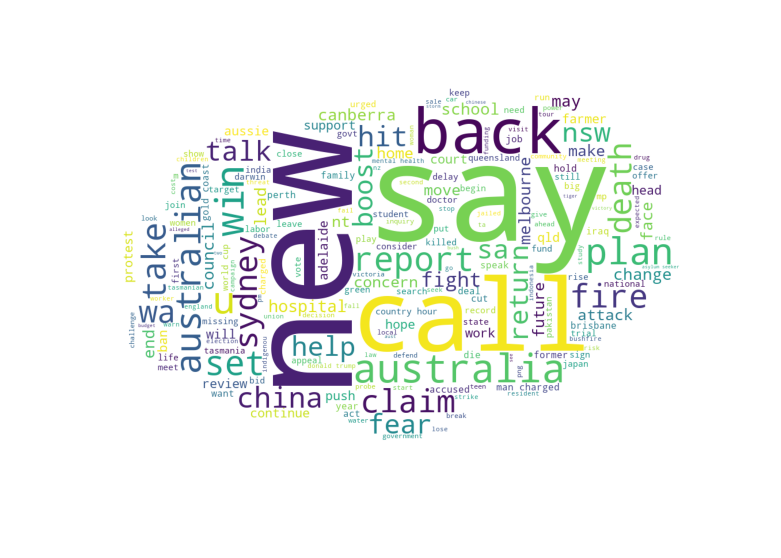

In [67]:
#negative
wc(df[df['sentiment']=="negative"].text)

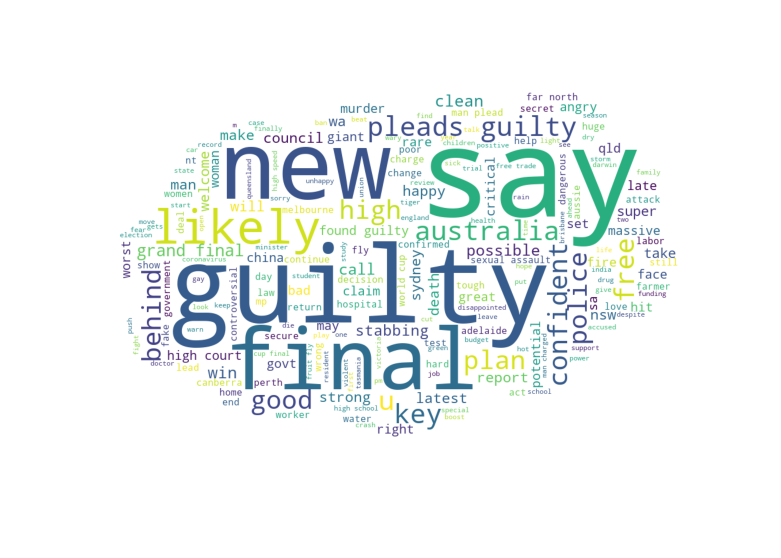

In [70]:
#pozitive
wc(df[df['sentiment']=="pozitive"].text)

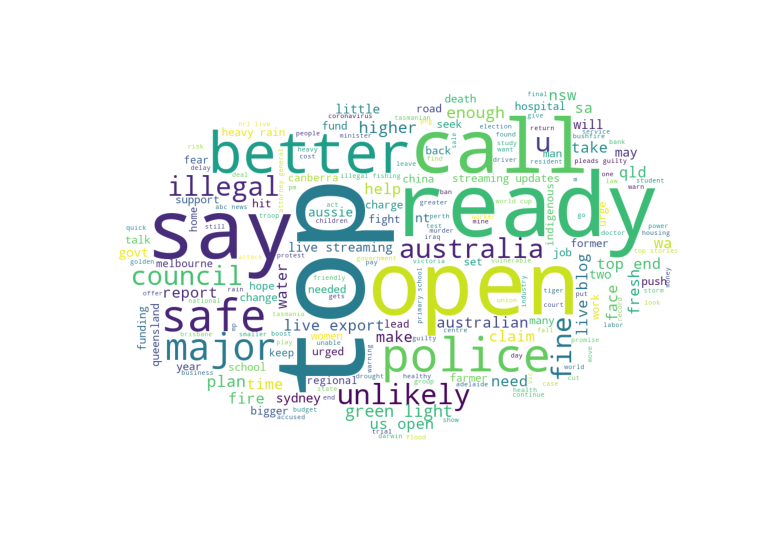

In [69]:
#neatural
wc(df[df['sentiment']=="neutral"].text)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [81]:
x,y=df['text'],df['sentiment']

In [82]:
x.shape,y.shape

((1226258,), (1226258,))

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [84]:
x_train

456878         pobeda hit with eight year uefa match fix ban
838089     babies diagnosed with new gastro and respirato...
993280     father son horse trainers hope banned from rac...
534213            robotic submarines used in oil rig salvage
663774                    victorian opens wine shop in china
                                 ...                        
327569       workers at venture industries to return to work
954440     expert warns radicalisation strategy needs loc...
1222755    nt chief minister says international flight ca...
1018945    aboriginal people concerned about land claims ...
395469                    vukovic fails in final olympic bid
Name: text, Length: 919693, dtype: object

In [85]:
y_train

456878     negative
838089     negative
993280     negative
534213     negative
663774     negative
             ...   
327569     negative
954440     negative
1222755    negative
1018945    negative
395469     pozitive
Name: sentiment, Length: 919693, dtype: object

In [86]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [87]:
x_train_dtm.shape,x_test_dtm.shape

((919693, 89953), (306565, 89953))

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [90]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [91]:
accuracy_score(y_test,b_predict)

0.9471498703374488